# Ex. 7.1 Central limit theorem

In this exercise you will have to simulate the throw of dices, using a random integer generator.
From these results you have to estimate and plot the Probability Distribution Function (PDF) and the Cumulative Distribution Function (CDF) for the result of one dice, as well as for the average score of N dices.


The PDFs and CDFs estimated have to be compared with the theoretical ones.  


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

## 7.1.1
Simulate the random throw of a 6 faced dice (with numbers from 1 to 6) 1000 times. 

Plot an histogram which shows the occurrence of each number as a density  (normalized by the total number of throws).

In the same plot plot also the theoretical probability distribution (PDF) of obtaining a given number (1-6) 


Repeat the plot showing the results obtained after 100 000 throws. 

Explain briefly what is changing between the two plots, and why one should agree more with the theory.

Text(0.5, 1.0, '1000 dice rolls')

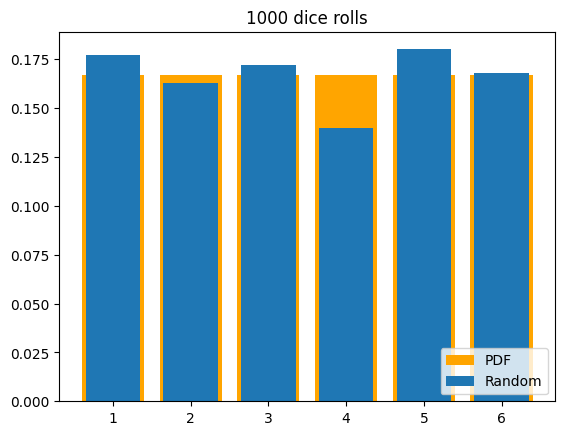

In [2]:
a = []
for i in range(1000):
    a.append(randint(1,7))

fig, ax = plt.subplots()
ax.bar([1,2,3,4,5,6], [1/6,1/6,1/6,1/6,1/6,1/6], color="orange")
ax.hist(a, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], rwidth=0.7, density=True, stacked=True)
ax.legend(["PDF","Random"], loc = "lower right")
ax.set_title("1000 dice rolls")

Text(0.5, 1.0, '100000 dice rolls')

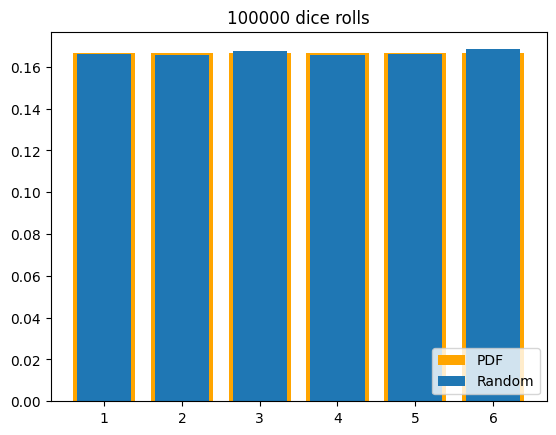

In [3]:
a = []
for i in range(100000):
    a.append(randint(1,7))

fig, ax = plt.subplots()
ax.bar([1,2,3,4,5,6], [1/6,1/6,1/6,1/6,1/6,1/6], color="orange")
ax.hist(a, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], rwidth=0.7, density=True, stacked=True)
ax.legend(["PDF","Random"], loc = "lower right")
ax.set_title("100000 dice rolls")

For sufficient sample size the results approach the PDF. That is the point of the PDF.

## 7.1.2
For the results obtained from 100 000 throws, plot an histogram of the cumulative distribution.

Show in the same plot the expected CDF from the theory. 

What is the probability of throwing a dice and obtaining a number smaller or equal to 2?  

Text(0.5, 1.0, '100000 cumulative dice rolls')

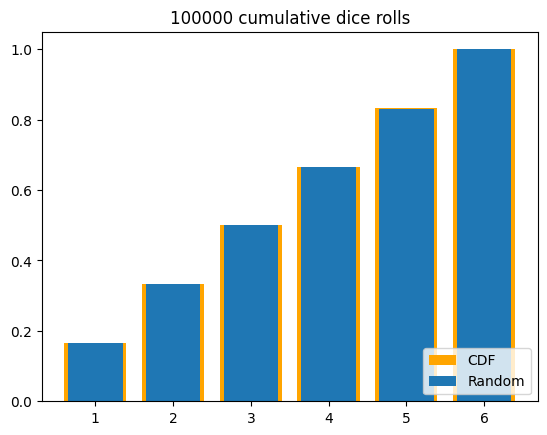

In [4]:
fig, ax = plt.subplots()
ax.bar([1,2,3,4,5,6], [1/6,2/6,3/6,4/6,5/6,6/6], color="orange")
ax.hist(a, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], rwidth=0.7, cumulative=True, density=True, stacked=True)
ax.legend(["CDF","Random"], loc = "lower right")
ax.set_title("100000 cumulative dice rolls")

The probability to roll a two or lower is 1/3.

## 7.1.3
In the three cases where N= 100, 300, or 1000 we would like to know the probability distribution of the average score after N throws of our dices.

Now the variable to be analyzed it is not the result of a single throw, but its average over N throws (the sum of all scores divided by N).

Calculate the average score over N throws 1000 times to give a good sampling of this variable.

Plot with an histogram the distributions for every N.

Add to the plot the PDF that can be predicted for every N using the central limit theorem:

$$ PDF(x) =\frac{1}{\sqrt{2 \pi \sigma_N^2}} e^\frac{(x-\mu_N)^2}{2\sigma_N^2}
$$

$\mu_N$ is the mean of the probability distribution (coincides with the mean of the one dice PDF  $\mu_N=\mu_1$ ) 
and $\sigma_N$ is the standard deviation  of the distribution, which is related to the STD of one dice $\sigma_1$ by the relationship $\sigma_N = \frac{\sigma_1}{ \sqrt{N}}$

$$ \sigma_1^2 = E[(x-\mu)^2]=\sum_{x=1}^6\frac{ (x-\mu)^2 }{6} $$

In [5]:
def STD():
    sig = 0
    for i in range(6):
        sig += (3.5-(i+1))**2/6
    return np.sqrt(sig)

def PDF_dice(N, x, sig, mu):
        sig_n2 = (sig/np.sqrt(N))**2
        a = np.sqrt(2*np.pi*sig_n2)
        z = -(x-mu)**2
        n = 2*sig_n2
        b = np.exp(z/n)
        return b/a

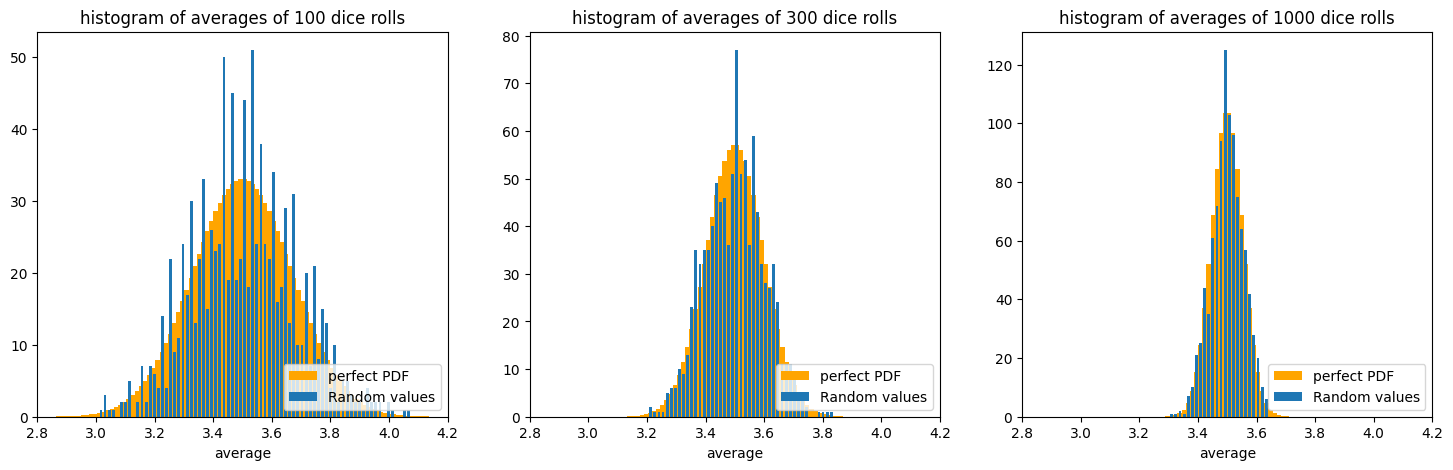

In [6]:
fig2, ax2 = plt.subplots(1,3,figsize=(18,5))

bins = np.linspace(2.8,4.2,101)
Nl = [100, 300, 1000]
cl = []
datapdf = []
sig = STD()
for k, N in enumerate(Nl):
    
    xl = np.linspace(2.8,4.2,100)
    PDF = PDF_dice(N, xl, sig, 3.5) # but like I dunno why this factor. Just doin it to make it a nice visual. ahahahhahhaaaaaaaaaaaaaaaaaa
    PDF = PDF * sum(PDF) / 5
    ax2[k].bar(xl,PDF,color = "orange", width = xl[1]-xl[0])
    ax2[k].set_xlim(2.8,4.2)

    b = []
    for j in range(1000):
        a = 0
        for i in range(N):
            a += randint(1,7)
        b.append(a/N)
    
    counts, trash, trash2 = ax2[k].hist(b, bins=bins, rwidth=0.7)
    ax2[k].legend(["perfect PDF","Random values"], loc = "lower right")
    ax2[k].set_title("histogram of averages of " + str(N) + " dice rolls")
    ax2[k].set_xlabel("average")
    
    cl.append(counts)
    datapdf.append(PDF)

## 7.1.4 

For the three values of N, plot the CDF of your data as well as the predicted CDF for an ideal gaussian with mean and standard distribution $\mu_N,\sigma_N$.

To do so import from scipy the Error function (to not be confused with a cost/loss function, sometimes also called error function) :

$$ Erf(z)= \frac{2}{\sqrt{\pi}} \int_0^z e^{-t^2} dt $$

In [7]:
from scipy.special import erf

In [8]:
def CDF_dice(x, mu, sig):
    return 1/2 * (1 + erf((x-mu)/(sig*np.sqrt(2))))

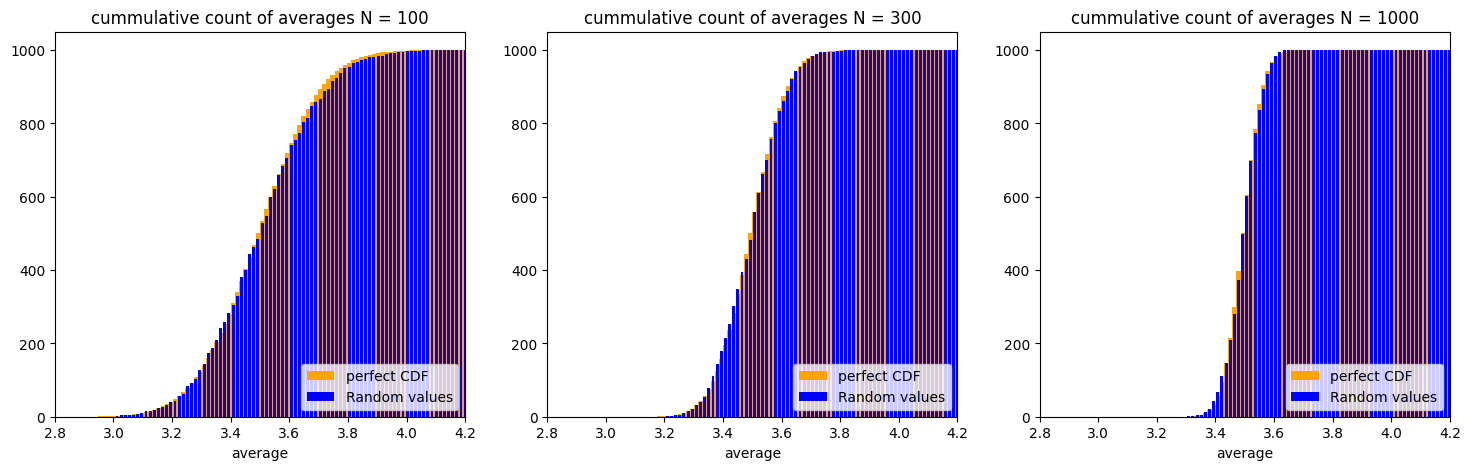

In [9]:
fig3, ax3 = plt.subplots(1,3,figsize=(18,5))

xl = np.linspace(2.8, 4.2, 100)
Nl = [100, 300, 1000]
sig = STD()

for k, N in enumerate(Nl):
    for j, l in enumerate(datapdf[k]):
        if not not j:
            (datapdf[k])[j] = l + (datapdf[k])[j-1]

    ax3[k].bar(xl, datapdf[k], color="orange", width=xl[1]-xl[0])
    ax3[k].set_xlim(2.8,4.2)

    for j, l in enumerate(cl[k]):
        if not not j:
            (cl[k])[j] = l + (cl[k])[j-1]

    ax3[k].bar(xl, cl[k], color="blue", width=0.01)
    ax3[k].legend(["perfect CDF","Random values"], loc = "lower right")
    ax3[k].set_title("cummulative count of averages N = " + str(N))
    ax3[k].set_xlabel("average")

# Ex 7.2 Statistical moments of histograms using Pandas.
You are given data on olympic athletes in the form of "A7_ex2_data.csv", a filtered version of the complete dataset found at [Kaggle.com](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/data). From this, you are going to analyse medal distributions.


Documentation about the Pandas library, can be found online at:
https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html <br>



## 7.2.1
Using pandas.read_csv, load the A7_ex2_data.csv file available on Moodle, the data will be uploaded as a pandas DataFrame (pandas.core.frame.DataFrame) . <br> 
A Gold medal counts as 3 points,a Silver one as 2 points and a Bronze as 1 point. If the $\texttt{"Medal"}$ field for an athlete is $\texttt{"NaN"}$, assume the athlete has not won a medal (0 points).<br>
Add to the DataFrame a new column "Score", which associate to every Medal the above mentioned points. HINT: initialize a new pandas.Series




In [10]:
import pandas as pd

In [11]:
def m_to_p(Medal):
    if Medal == "Gold":
        return 3
    if Medal == "Silver":
        return 2
    if Medal == "Bronze":
        return 1
    else:
        return 0

In [12]:
df = pd.read_csv("A7_ex2_data.csv")

points = []
for i in range(len(df["ID"])):
    points.append(m_to_p((df["Medal"])[i]))
df["Score"] = points

## 7.2.2
Divide the pandas DataFrame in two, one for male and the other for female participants. <br>

For both genders extract the following data from the DataFrame: <br>
1)total participant number per age  <br>
2)the total score per age (sum the points for every medal won by atletes of a given age) <br>
3)the average score per participant (of given age) per age. <br>

In case an athlete participated in multiple competitions, you can count them as multiple participants. <br>


In [13]:
dfm = df[df["Sex"]=="M"]
dff = df[df["Sex"]=="F"]

participants_per_age_m = dfm["Age"].value_counts().sort_index()
participants_per_age_f = dff["Age"].value_counts().sort_index()

score_per_age_m = {}
for i in np.arange(min(dfm["Age"]), max(dfm["Age"]), 1):
    score_per_age_m[i] = (dfm[dfm["Age"] == i])["Score"].sum()

score_per_age_f = {}
for i in np.arange(min(dff["Age"]), max(dff["Age"]), 1):
    score_per_age_f[i] = (dff[dff["Age"] == i])["Score"].sum()

avg_score_per_age_m = {}
for i in np.arange(min(dfm["Age"]), max(dfm["Age"]), 1):
    avg_score_per_age_m[i] = (dfm[dfm["Age"] == i])["Score"].mean()

avg_score_per_age_f = {}
for i in np.arange(min(dff["Age"]), max(dff["Age"]), 1):
    avg_score_per_age_f[i] = (dff[dff["Age"] == i])["Score"].mean()


## 7.2.3
Plot these 6 distributions into a single figure with 6 subplots (row 0 corresponds to female participants, row 1 to male participants).

Text(0, 0.5, 'average score by corresponding age')

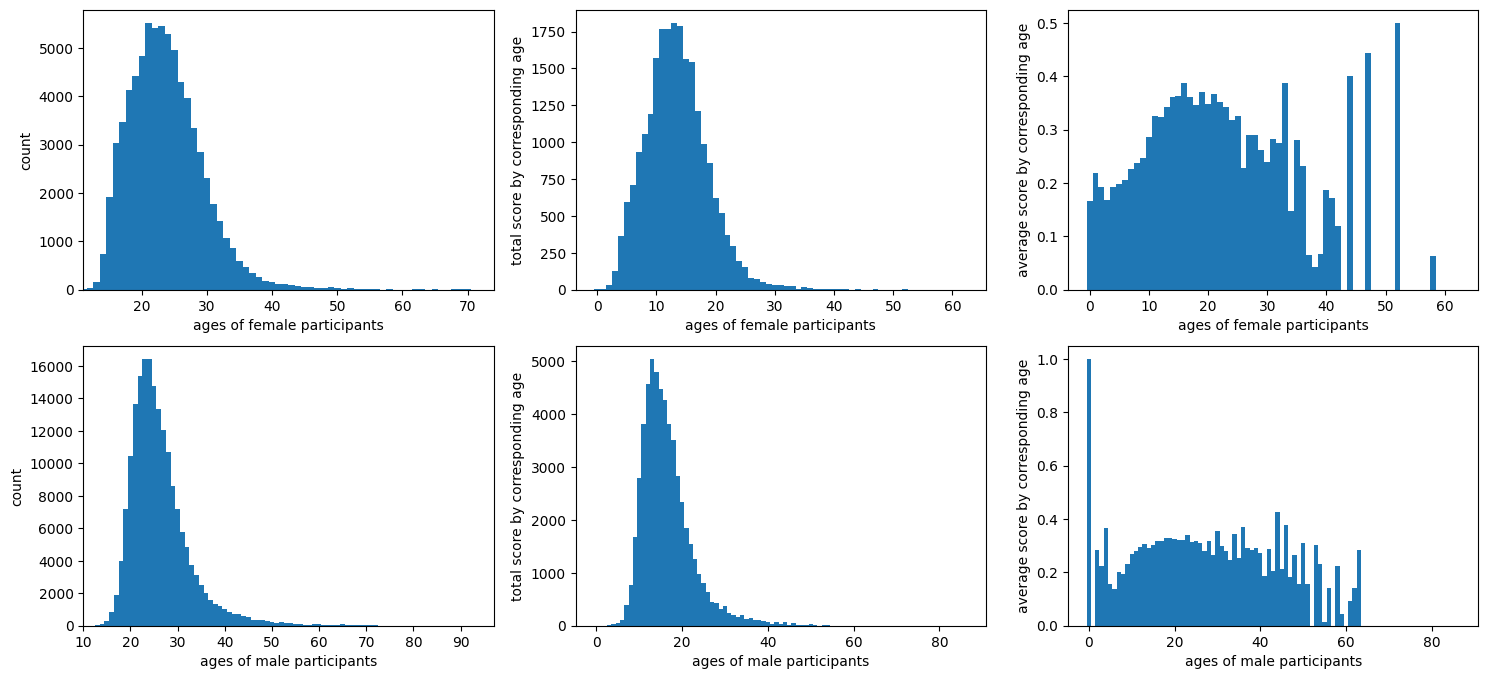

In [14]:
fig, ax = plt.subplots(2,3,figsize=(18,8))

ax[0,0].bar(participants_per_age_f.index, participants_per_age_f.values, width = 1)
ax[0,0].set_xlim(min(participants_per_age_f.index),
                  max(participants_per_age_f.index))
ax[0,0].set_xlabel("ages of female participants")
ax[0,0].set_ylabel("count")

ax[1,0].bar(participants_per_age_m.index, participants_per_age_m.values, width = 1)
ax[1,0].set_xlim(min(participants_per_age_m.index),
                  max(participants_per_age_m.index))
ax[1,0].set_xlabel("ages of male participants")
ax[1,0].set_ylabel("count")

ax[0,1].bar(range(len(score_per_age_f)), list(score_per_age_f.values()), width = 1)
ax[0,1].set_xlabel("ages of female participants")
ax[0,1].set_ylabel("total score by corresponding age")

ax[1,1].bar(range(len(score_per_age_m)), list(score_per_age_m.values()), width = 1)
ax[1,1].set_xlabel("ages of male participants")
ax[1,1].set_ylabel("total score by corresponding age")

ax[0,2].bar(range(len(avg_score_per_age_f)), list(avg_score_per_age_f.values()), width = 1)
ax[0,2].set_xlabel("ages of female participants")
ax[0,2].set_ylabel("average score by corresponding age")

ax[1,2].bar(range(len(avg_score_per_age_m)), list(avg_score_per_age_m.values()), width = 1)
ax[1,2].set_xlabel("ages of male participants")
ax[1,2].set_ylabel("average score by corresponding age")

## 7.2.4

Define a function which computes the following (weighted) statistical quantities of participant ages of all 6 distributions:
<ul>
    <li>Mean
    <li>Standard deviation 
    <li>variance 
    <li>Skewness 
    <li>Kurtosis. 
</ul>
HINT: You can cast pandas Series to np arrays using the to_numpy function. DataFrame.index returns the index colum of a DataFrame .

$\textbf{Hints:}$ The weighted mean is given as:    $\bar{x} = \sum_{i} x_i \cdot w(x_i) / \sum_{i} w(x_i)$. 

The $n$-th weighted moment is given as $m_k = \sum_{i} (x_i - \bar{x})^k \cdot w(x_i) / \sum_{i} w(x_i)$. 

The variance is: $ \sigma^2 = m_2$

The skewness is given as $m_3 / \sigma^{3}$.

The kurtosis is given as $m_4 / \sigma^4$.

To clearify: $x$ is the age, $w(x)$ are the different distributions.

In [15]:
def k_mom(k, mean, idx, val):
    a, b = 0, 0
    for i, n in enumerate(idx):
        a += ((n-mean)**k)*val[i]
        b += val[i]
    return a/b

def analyse(data):

    if type(data) == type(participants_per_age_m):
        idx = list(data.index)
        val = list(data.values)
    if type(data) == dict:
        idx, val = [], []
        for id, va in data.items():
            if not math.isnan(va):
                idx.append(id)
                val.append(va)
                
    a, b = 0, 0
    for i, n in enumerate(idx):
        a += n*val[i]
        b += val[i]
    mean = a/b
    var = k_mom(2, mean, idx, val)
    dev = np.sqrt(var)
    skew = k_mom(3, mean, idx, val)/(dev**3)
    kurt = k_mom(4, mean, idx, val)/(dev**4)

    return mean, dev, var, skew, kurt

## 7.2.5
Plot again the 6 distributions, highlighting the mean and the region included in one standard deviation ([$\mu-\sigma,\mu+\sigma$]) , ( you can use axvline and axvspan ).

Recalling from theory that:
<ul>
<li>M3 (Skewness) is a symmetry index if M3=0 if the distribution is symmetric

<li>M4 (Kourtosis) is a measure for tail contribution (high exponents favor large x-μ values)

<li> Skewness and Kourosis are normalized by the standard deviation .
</ul>

Reply to the following questions:
<ul>
<li> Which distribution has the highest and which the lowest skewness? How this correlates with the shape of the plots?
<li>Which distribution has the highest and which the lowest kourtosis? How this correlates with the shape of the plots?
</ul>

Text(75, 1, '$\\mathrm{skew}=0.14$\n$\\mathrm{kurtosis}=2.08$')

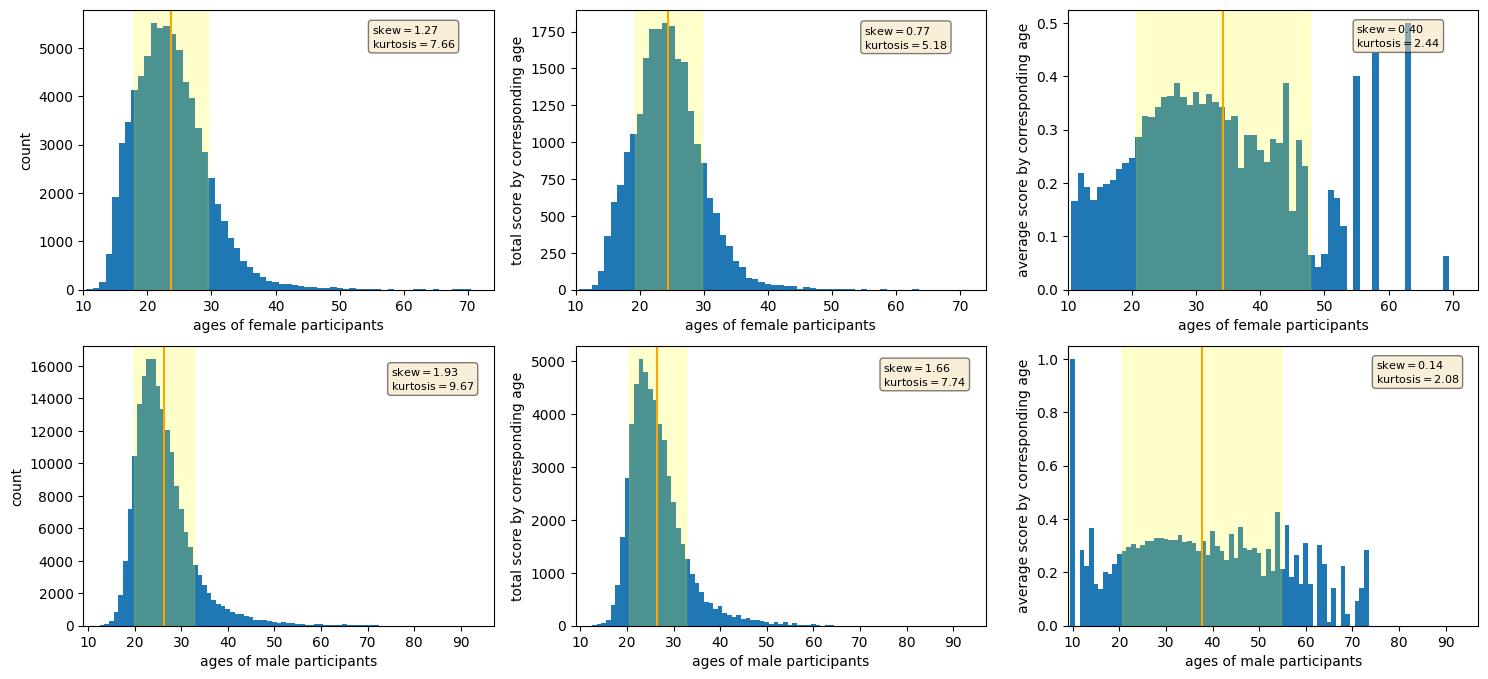

In [16]:
mean1, dev1, var1, skew1, kurt1 = analyse(participants_per_age_f)
mean2, dev2, var2, skew2, kurt2 = analyse(participants_per_age_m)
mean3, dev3, var3, skew3, kurt3 = analyse(score_per_age_f)
mean4, dev4, var4, skew4, kurt4 = analyse(score_per_age_m)
mean5, dev5, var5, skew5, kurt5 = analyse(avg_score_per_age_f)
mean6, dev6, var6, skew6, kurt6 = analyse(avg_score_per_age_m)

textstr1 = '\n'.join((
    r'$\mathrm{skew}=%.2f$' % (skew1),
    r'$\mathrm{kurtosis}=%.2f$' % (kurt1)))
textstr2 = '\n'.join((
    r'$\mathrm{skew}=%.2f$' % (skew2),
    r'$\mathrm{kurtosis}=%.2f$' % (kurt2)))
textstr3 = '\n'.join((
    r'$\mathrm{skew}=%.2f$' % (skew3),
    r'$\mathrm{kurtosis}=%.2f$' % (kurt3)))
textstr4 = '\n'.join((
    r'$\mathrm{skew}=%.2f$' % (skew4),
    r'$\mathrm{kurtosis}=%.2f$' % (kurt4)))
textstr5 = '\n'.join((
    r'$\mathrm{skew}=%.2f$' % (skew5),
    r'$\mathrm{kurtosis}=%.2f$' % (kurt5)))
textstr6 = '\n'.join((
    r'$\mathrm{skew}=%.2f$' % (skew6),
    r'$\mathrm{kurtosis}=%.2f$' % (kurt6)))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)



fig, ax = plt.subplots(2,3,figsize=(18,8))

ax[0,0].bar(participants_per_age_f.index, participants_per_age_f.values, width = 1)
ax[0,0].axvline(mean1, color = "orange")
ax[0,0].axvspan(mean1-dev1, mean1+dev1, color = "yellow", alpha = 0.2)
ax[0, 0].set_xlim(min(participants_per_age_f.index)-1,
                  max(participants_per_age_f.index))
ax[0,0].set_xlabel("ages of female participants")
ax[0,0].set_ylabel("count")
ax[0,0].text(55, 5500, textstr1, fontsize=8,
              verticalalignment='top', bbox=props)

ax[1,0].bar(participants_per_age_m.index, participants_per_age_m.values, width = 1)
ax[1, 0].axvline(mean2, color="orange")
ax[1, 0].axvspan(mean2-dev2, mean2+dev2, color="yellow", alpha=0.2)
ax[1,0].set_xlim(min(participants_per_age_m.index)-1,
                  max(participants_per_age_m.index))
ax[1,0].set_xlabel("ages of male participants")
ax[1,0].set_ylabel("count")
ax[1, 0].text(75, 16000, textstr2, fontsize=8,
              verticalalignment='top', bbox=props)


ax[0,1].bar(list(score_per_age_f.keys()), list(score_per_age_f.values()), width = 1)
ax[0, 1].axvline(mean3, color="orange")
ax[0, 1].axvspan(mean3-dev3, mean3+dev3, color="yellow", alpha=0.2)
ax[0, 1].set_xlim(min(participants_per_age_f.index)-1,
                  max(participants_per_age_f.index))
ax[0,1].set_xlabel("ages of female participants")
ax[0,1].set_ylabel("total score by corresponding age")
ax[0, 1].text(55, 1800, textstr3, fontsize=8,
              verticalalignment='top', bbox=props)

ax[1, 1].bar(list(score_per_age_m.keys()), list(
    score_per_age_m.values()), width=1)
ax[1, 1].axvline(mean4, color="orange")
ax[1, 1].axvspan(mean4-dev4, mean4+dev4, color="yellow", alpha=0.2)
ax[1, 1].set_xlim(min(participants_per_age_m.index)-1,
                  max(participants_per_age_m.index))
ax[1,1].set_xlabel("ages of male participants")
ax[1,1].set_ylabel("total score by corresponding age")
ax[1, 1].text(75, 5000, textstr4, fontsize=8,
              verticalalignment='top', bbox=props)


ax[0, 2].bar(list(avg_score_per_age_f.keys()), list(
    avg_score_per_age_f.values()), width=1)
ax[0, 2].axvline(mean5, color="orange")
ax[0, 2].axvspan(mean5-dev5, mean5+dev5, color="yellow", alpha=0.2)
ax[0, 2].set_xlim(min(participants_per_age_f.index)-1, max(participants_per_age_f.index))
ax[0,2].set_xlabel("ages of female participants")
ax[0,2].set_ylabel("average score by corresponding age")
ax[0, 2].text(55, 1/2, textstr5, fontsize=8,
              verticalalignment='top', bbox=props)

ax[1, 2].bar(list(avg_score_per_age_m.keys()), list(
    avg_score_per_age_m.values()), width=1)
ax[1, 2].axvline(mean6, color="orange")
ax[1, 2].axvspan(mean6-dev6, mean6+dev6, color="yellow", alpha=0.2)
ax[1, 2].set_xlim(min(participants_per_age_m.index)-1,
                  max(participants_per_age_m.index))
ax[1,2].set_xlabel("ages of male participants")
ax[1,2].set_ylabel("average score by corresponding age")
ax[1, 2].text(75, 1, textstr6, fontsize=8,
              verticalalignment='top', bbox=props)
